In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
import json
import os
import folium
import warnings
warnings.filterwarnings('ignore')

# from geopy.geocoders import Nominatim

In [2]:
import sys
import os

sys.path.insert(0, 'file/carnevale.ipynb')
from functions import haversine_distance,euclidean_distance,haversine_distance_normalized,euclidean_distance_normalized,custom_distance, find_csv_files, choose_dataset

In [3]:
dr = '/Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/'
dr_data = '/Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/'
#stops = pd.read_csv(dr+'gtfs/'+'stops.txt', sep=',')
#stops.rename(columns={"stop_id": "FERMATA","stop_name": "NOME_FERMATA", "stop_lat": "LATITUDE", "stop_lon": "LONGITUDE"}, inplace=True)
#cols = ['FERMATA','NOME_FERMATA','LATITUDE','LONGITUDE']
#stops = stops[cols]
#stops.to_csv(dr+'gtfs/'+ 'stops.csv',index=False)

#stops = pd.read_csv(dr+'gtfs/'+ 'stops.csv')
#print(f'stops.shape: {stops.shape}')
#stops

In [4]:
def find_csv_files(folder_path: str) -> list:
    """
        This function returns a list of all the csv files in the specified folder.
        :param folder_path: the path of the folder
        :return: a list of all the csv files in the specified folder
    """

    csv_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # File extension is .txt or .csv
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))
    # Sort the list of txt files in alphabetical order
    csv_files.sort()

    return csv_files

def choose_dataset(txt_files: list) -> str:
    """
        This function returns the path of the txt file chosen by the user.
        :param txt_files: the list of txt files
        :return: the path of the txt file chosen by the user
    """
    if not txt_files:
        print("No TXT file found.")
        return "None"
    if len(txt_files) == 1:
        print("The following file was found:")
    else:
        print("The following files were found:")
    for i, file_path in enumerate(txt_files):
        print(f"{i+1}. {file_path}")
    while True:
        choice = input("Enter the number corresponding to the dataset you wish to use (0 to exit): ")
        if not choice.isdigit():
            print("Enter a valid number.")
            continue
        choice = int(choice)
        if choice == 0:
            return "None"
        if choice < 1 or choice > len(txt_files):
            print("Enter a valid number.")
            continue
        return txt_files[choice - 1]
    

In [5]:
# Open the dataset that has also the geo coordinates
# Find all txt files in the data folder
csv_file = find_csv_files('/Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/')

print("Select a dataset with geo coordinates from the list:")

# Choose a dataset from the list of txt files
selected_dataset = choose_dataset(csv_file)

if selected_dataset:
    print(f"You selected the dataset {selected_dataset}")
else:
    print("No dataset selected.")

path  = selected_dataset

Select a dataset with geo coordinates from the list:
The following files were found:
1. /Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/dataset_cleaned_tempesportazioneCompleta.csv
2. /Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/dataset_cleaned_tempesportazioneCompleta_after.csv
3. /Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/dataset_cleaned_tempesportazioneCompleta_before.csv
4. /Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/dataset_cleaned_tempesportazioneCompleta_during.csv
5. /Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/dataset_cleaned_tempesportazionePasqua23_part1.csv
6. /Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/dataset_cleaned_tempesportazionePa

In [6]:
dr_notebook = 'file/csvPuliti'
# dataset_compl = pd.read_csv(dr_data+'dataset_cleaned_tempesportazionePasqua23_part1.csv')

dataset_compl = pd.read_csv(path, header=0, sep=',')


print(f'dataset_compl.shape: {dataset_compl.shape}')
dataset_compl.head()

dataset_compl.shape: (4947477, 9)


,DATA,ORA,DATA_VALIDAZIONE,FERMATA,DESCRIZIONE,TICKET_CODE,DESCRIZIONE_TITOLO,LATITUDE,LONGITUDE
0,2023-01-13,00:00:00,2023-01-13 00:00:00,-3,Stazione Mestre,7,BIGL.AUT.75'MESTRE/LIDO-TSC,45.482675,12.231809
1,2023-01-13,05:21:00,2023-01-13 05:21:00,-3,Stazione Mestre,5,MENSILE ORDINARIO RETE UNICA,45.482675,12.231809
2,2023-01-13,07:01:00,2023-01-13 07:01:00,-3,Stazione Mestre,5,MENSILE ORDINARIO RETE UNICA,45.482675,12.231809
3,2023-01-13,07:02:00,2023-01-13 07:02:00,-3,Stazione Mestre,5,MENSILE ORDINARIO RETE UNICA,45.482675,12.231809
4,2023-01-13,07:36:00,2023-01-13 07:36:00,-3,Stazione Mestre,7,BIGL.AUT.75'MESTRE/LIDO-TSC,45.482675,12.231809


In [7]:
print(dataset_compl.dtypes)

DATA                   object
ORA                    object
DATA_VALIDAZIONE       object
FERMATA                 int64
DESCRIZIONE            object
TICKET_CODE            object
DESCRIZIONE_TITOLO     object
LATITUDE              float64
LONGITUDE             float64
dtype: object


In [8]:
num_fermate = dataset_compl['FERMATA'].nunique()
print(f'Numero di fermate distinte: {num_fermate}')

Numero di fermate distinte: 126


In [9]:
#dataset_compl_isola_fermate = dataset_compl.copy()

#dataset_compl_isola_fermate = dataset_compl_isola_fermate[()]

In [10]:
dataset_compl['DATA_VALIDAZIONE'] = pd.to_datetime(dataset_compl['DATA_VALIDAZIONE'])
dataset_compl['DATA'] = pd.to_datetime(dataset_compl['DATA'])
#dataset_compl.dtypes

In [11]:
# Print the interval of dates for which we have data
print(f'Date range: {dataset_compl.DATA_VALIDAZIONE.min()} to {dataset_compl.DATA_VALIDAZIONE.max()}')

Date range: 2023-01-13 00:00:00 to 2023-03-14 23:59:00


In [12]:
dataset_clust = dataset_compl.copy()
#dataset_clust.drop(columns=['DATA', 'ORA','DESCRIZIONE_TITOLO'],inplace=True)
dataset_clust.drop(columns=['DESCRIZIONE_TITOLO'],inplace=True)
dataset_clust.head(3)

,DATA,ORA,DATA_VALIDAZIONE,FERMATA,DESCRIZIONE,TICKET_CODE,LATITUDE,LONGITUDE
0,2023-01-13,00:00:00,2023-01-13 00:00:00,-3,Stazione Mestre,7,45.482675,12.231809
1,2023-01-13,05:21:00,2023-01-13 05:21:00,-3,Stazione Mestre,5,45.482675,12.231809
2,2023-01-13,07:01:00,2023-01-13 07:01:00,-3,Stazione Mestre,5,45.482675,12.231809


In [13]:
print(dataset_clust.TICKET_CODE.unique())

['7' '5' '6-STUD' '4' '5-STUD' '3' '6-RET' '6' '2' '1' '5-WKRS' '6-WKRS']


In [14]:
# Change 5-STUD, 6-STUD to STUD in the dataframe
dataset_clust['TICKET_CODE'] = dataset_clust['TICKET_CODE'].replace(['5-STUD', '6-STUD'], 'STUD')
# Change 5-WKRS, 6-WKRS to WKRS in the dataframe
dataset_clust['TICKET_CODE'] = dataset_clust['TICKET_CODE'].replace(['5-WKRS', '6-WKRS'], 'WKRS')
# Change 5-RET, 6-RET to RET in the dataframe
dataset_clust['TICKET_CODE'] = dataset_clust['TICKET_CODE'].replace(['5-RET', '6-RET'], 'RET')
# Change 5, 6 to LOC (that means locals) in the dataframe
dataset_clust['TICKET_CODE'] = dataset_clust['TICKET_CODE'].replace(['5', '6'], 'LOC')
# Change 1, 2, 3, 4 to tuorist TUR in the dataframe
dataset_clust['TICKET_CODE'] = dataset_clust['TICKET_CODE'].replace(['1', '2', '3', '4'], 'TUR')



# Print the unique ticket codes
# Print information about the changes made
print('The ticket codes 5-STUD and 6-STUD have been changed to STUD')
print('The ticket codes 5-WKRS and 6-WKRS have been changed to WKRS')
print('The ticket codes 5-RET and 6-RET have been changed to RET')
print('The ticket codes 5 and 6 have been changed to LOC')
print('The ticket codes 1, 2, 3 and 4 have been changed to TUR')

# Convert all the ticket codes to string
dataset_clust['TICKET_CODE'] = dataset_clust['TICKET_CODE'].astype(str)

ticket_codes = dataset_clust['TICKET_CODE'].unique()
# Sort the ticket codes
ticket_codes.sort()

print('The considered ticket codes are: ', ticket_codes)

# Convert all the ticket codes to string
dataset_clust['TICKET_CODE'] = dataset_clust['TICKET_CODE'].astype(str)

The ticket codes 5-STUD and 6-STUD have been changed to STUD
The ticket codes 5-WKRS and 6-WKRS have been changed to WKRS
The ticket codes 5-RET and 6-RET have been changed to RET
The ticket codes 5 and 6 have been changed to LOC
The ticket codes 1, 2, 3 and 4 have been changed to TUR
The considered ticket codes are:  ['7' 'LOC' 'RET' 'STUD' 'TUR' 'WKRS']


In [15]:
num_fermate = dataset_clust['FERMATA'].nunique()
print(f'Numero di fermate distinte: {num_fermate}')

Numero di fermate distinte: 126


## Clustering in base ai ticket codes e rispetto alla vicinanza geografica delle celle

In [16]:
# Create a dataframe of stops
df_stop = dataset_clust.copy()
#df_stop = df_stop[['LATITUDE', 'LONGITUDE', 'CLUSTER','FERMATA']]
print(f'df_stop.shape: {df_stop.shape}')
df_stop.tail()

df_stop.shape: (4947477, 8)


,DATA,ORA,DATA_VALIDAZIONE,FERMATA,DESCRIZIONE,TICKET_CODE,LATITUDE,LONGITUDE
4947472,2023-03-05,18:48:00,2023-03-05 18:48:00,5117,Murano Da Mu,7,45.456116,12.351936
4947473,2023-03-04,10:30:00,2023-03-04 10:30:00,5610,Lazzaretto N,7,45.454956,12.386839
4947474,2023-03-04,10:35:00,2023-03-04 10:35:00,5610,Lazzaretto N,7,45.454956,12.386839
4947475,2023-03-14,13:59:00,2023-03-14 13:59:00,5118,"Zitelle ""A""",7,45.426624,12.337678
4947476,2023-03-14,17:15:00,2023-03-14 17:15:00,5118,"Zitelle ""A""",7,45.426624,12.337678


In [17]:
df_stop_count = df_stop.groupby(['LATITUDE', 'LONGITUDE', 'TICKET_CODE', 'FERMATA', 'DESCRIZIONE']).size().reset_index(name='COUNT')

print(f'df_stop_count.shape: {df_stop_count.shape}')
df_stop_count.head(10)

df_stop_count.shape: (582, 6)


,LATITUDE,LONGITUDE,TICKET_CODE,FERMATA,DESCRIZIONE,COUNT
0,45.223690,12.280678,7,5072,Chioggia,8778
1,45.223690,12.280678,LOC,5072,Chioggia,5897
2,45.223690,12.280678,RET,5072,Chioggia,231
3,45.223690,12.280678,STUD,5072,Chioggia,653
4,45.223690,12.280678,TUR,5072,Chioggia,1295
5,45.223690,12.280678,WKRS,5072,Chioggia,1
6,45.243614,12.294001,7,5017,Caroman,3
7,45.262791,12.299958,7,5073,Pellestrina,1531
8,45.262791,12.299958,LOC,5073,Pellestrina,436
9,45.262791,12.299958,RET,5073,Pellestrina,8


In [18]:
# Describe the column COUNT
df_stop_count['COUNT'].describe()

count       582.000000
mean       8500.819588
std       28309.891341
min           1.000000
25%          43.250000
50%         592.500000
75%        6193.500000
max      479994.000000
Name: COUNT, dtype: float64

In [19]:
df_stop_count.head(10)


,LATITUDE,LONGITUDE,TICKET_CODE,FERMATA,DESCRIZIONE,COUNT
0,45.223690,12.280678,7,5072,Chioggia,8778
1,45.223690,12.280678,LOC,5072,Chioggia,5897
2,45.223690,12.280678,RET,5072,Chioggia,231
3,45.223690,12.280678,STUD,5072,Chioggia,653
4,45.223690,12.280678,TUR,5072,Chioggia,1295
5,45.223690,12.280678,WKRS,5072,Chioggia,1
6,45.243614,12.294001,7,5017,Caroman,3
7,45.262791,12.299958,7,5073,Pellestrina,1531
8,45.262791,12.299958,LOC,5073,Pellestrina,436
9,45.262791,12.299958,RET,5073,Pellestrina,8


In [20]:
# Pivot table for the ticket codes but maintaining the information about the stops
df_stop_count = df_stop_count.pivot_table(index=['LATITUDE', 'LONGITUDE', 'FERMATA', 'DESCRIZIONE'], columns='TICKET_CODE', values='COUNT', fill_value=0)
df_stop_count.reset_index(inplace=True)

# For each stop (LATITUDE, LONGITUDE), change the counter of each ticket code as a percentage of the total number of tickets
for row in range(len(df_stop_count)):
    total = df_stop_count.iloc[row, 4:].sum()
    for col in range(4, len(df_stop_count.columns)):
        df_stop_count.iloc[row, col] = df_stop_count.iloc[row, col] / total * 100

In [21]:
print(df_stop_count.at[0, 'TUR'])

7.683180065262533


In [22]:
num_locations = len(df_stop_count)
print(f'num_locations: {num_locations}')
haversine_matrix = np.zeros((num_locations, num_locations))
euclidean_distances = np.zeros((num_locations, num_locations))

for i in range(num_locations):
    for j in range(i + 1, num_locations):
        coord1 = (df_stop_count.at[i, 'LATITUDE'], df_stop_count.at[i, 'LONGITUDE'])
        coord2 = (df_stop_count.at[j, 'LATITUDE'], df_stop_count.at[j, 'LONGITUDE'])
        distance = haversine_distance(coord1, coord2)
        haversine_matrix[i][j] = distance
        haversine_matrix[j][i] = distance  # Since distance is symmetric
        
        stops1 = [df_stop_count.at[i, 'TUR'],df_stop_count.at[i, '7'], df_stop_count.at[i, 'LOC'],
                    df_stop_count.at[i, 'RET'], df_stop_count.at[i, 'STUD'], df_stop_count.at[i, 'WKRS']]
        stops2 = [df_stop_count.at[j, 'TUR'], df_stop_count.at[j, '7'], df_stop_count.at[j, 'LOC'],
                    df_stop_count.at[j, 'RET'], df_stop_count.at[j, 'STUD'], df_stop_count.at[j, 'WKRS']]
        
    
        stops1 = np.array(stops1)
        stops2 = np.array(stops2)

        euclidean_dist = euclidean_distance(stops1, stops2)
        euclidean_distances[i][j] = euclidean_dist
        euclidean_distances[j][i] = euclidean_dist  # Since distance is symmetric
        

# Create a DataFrame to store the haversine distances
haversine_df = pd.DataFrame(haversine_matrix, index=df_stop_count.index, columns=df_stop_count.index)

# Find the minimum and maximum haversine distances
min_distance = haversine_df.values.min()
max_distance = haversine_df.values.max()
avg_euclidean_distance = euclidean_distances.mean()


# Print the haversine distance DataFrame and the minimum and maximum distances
#print("Haversine Distance DataFrame:")
#print(haversine_df)

print("Minimum Haversine Distance:", min_distance, "km")
print("Maximum Haversine Distance:", max_distance, "km")


# Create a DataFrame to store the haversine distances
euclidean_df = pd.DataFrame(euclidean_distances, index=df_stop_count.index, columns=df_stop_count.index)

# Find the minimum and maximum Euclidean distances
min_euclidean_distance = euclidean_distances.min()
max_euclidean_distance = euclidean_distances.max()

# Print the haversine distance DataFrame and the minimum and maximum distances
#print("Haversine Distance DataFrame:")
#print(haversine_df)

# Now you have the normalized Euclidean distances in the range [0, 1]
print("Minimum Euclidean Distance:", min_euclidean_distance.min())
print("Maximum Euclidean Distance:", max_euclidean_distance.max())
print("Average Euclidean Distance:", avg_euclidean_distance/max_euclidean_distance)

num_locations: 126
Minimum Haversine Distance: 0.0 km
Maximum Haversine Distance: 32.907659114956466 km
Minimum Euclidean Distance: 0.0
Maximum Euclidean Distance: 127.74747321441036
Average Euclidean Distance: 0.3521467923353032


In [23]:
#min(min_euclidean_distance), max(max_euclidean_distance)
max_euclidean_distance

127.74747321441036

In [24]:
# From df_stop_count remove descrizione
df_stop_count_data = df_stop_count.copy()
df_stop_count_data = df_stop_count_data.drop(columns=['FERMATA','DESCRIZIONE'])

data = df_stop_count_data.values
print(data.shape)
data[0]

(126, 8)


array([4.52236900e+01, 1.22806780e+01, 5.20795016e+01, 3.49866508e+01,
       1.37051320e+00, 3.87422130e+00, 7.68318007e+00, 5.93295758e-03])

In [25]:
#stop 1: 5102.0, stop2: 5103.0, combined_distance: 0.0396467042622267
#stop 1: 5102.0, stop2: -5.0, combined_distance: 0.22699456069457805
#stop 1: 5102.0, stop2: -2.0, combined_distance: 0.34764672602143193

#stop 1: 5050.0, stop2: 5049.0, combined_distance: 0.0017922304598963794 --> stesso cluster

coord_weight: 0, similarity_weight: 1


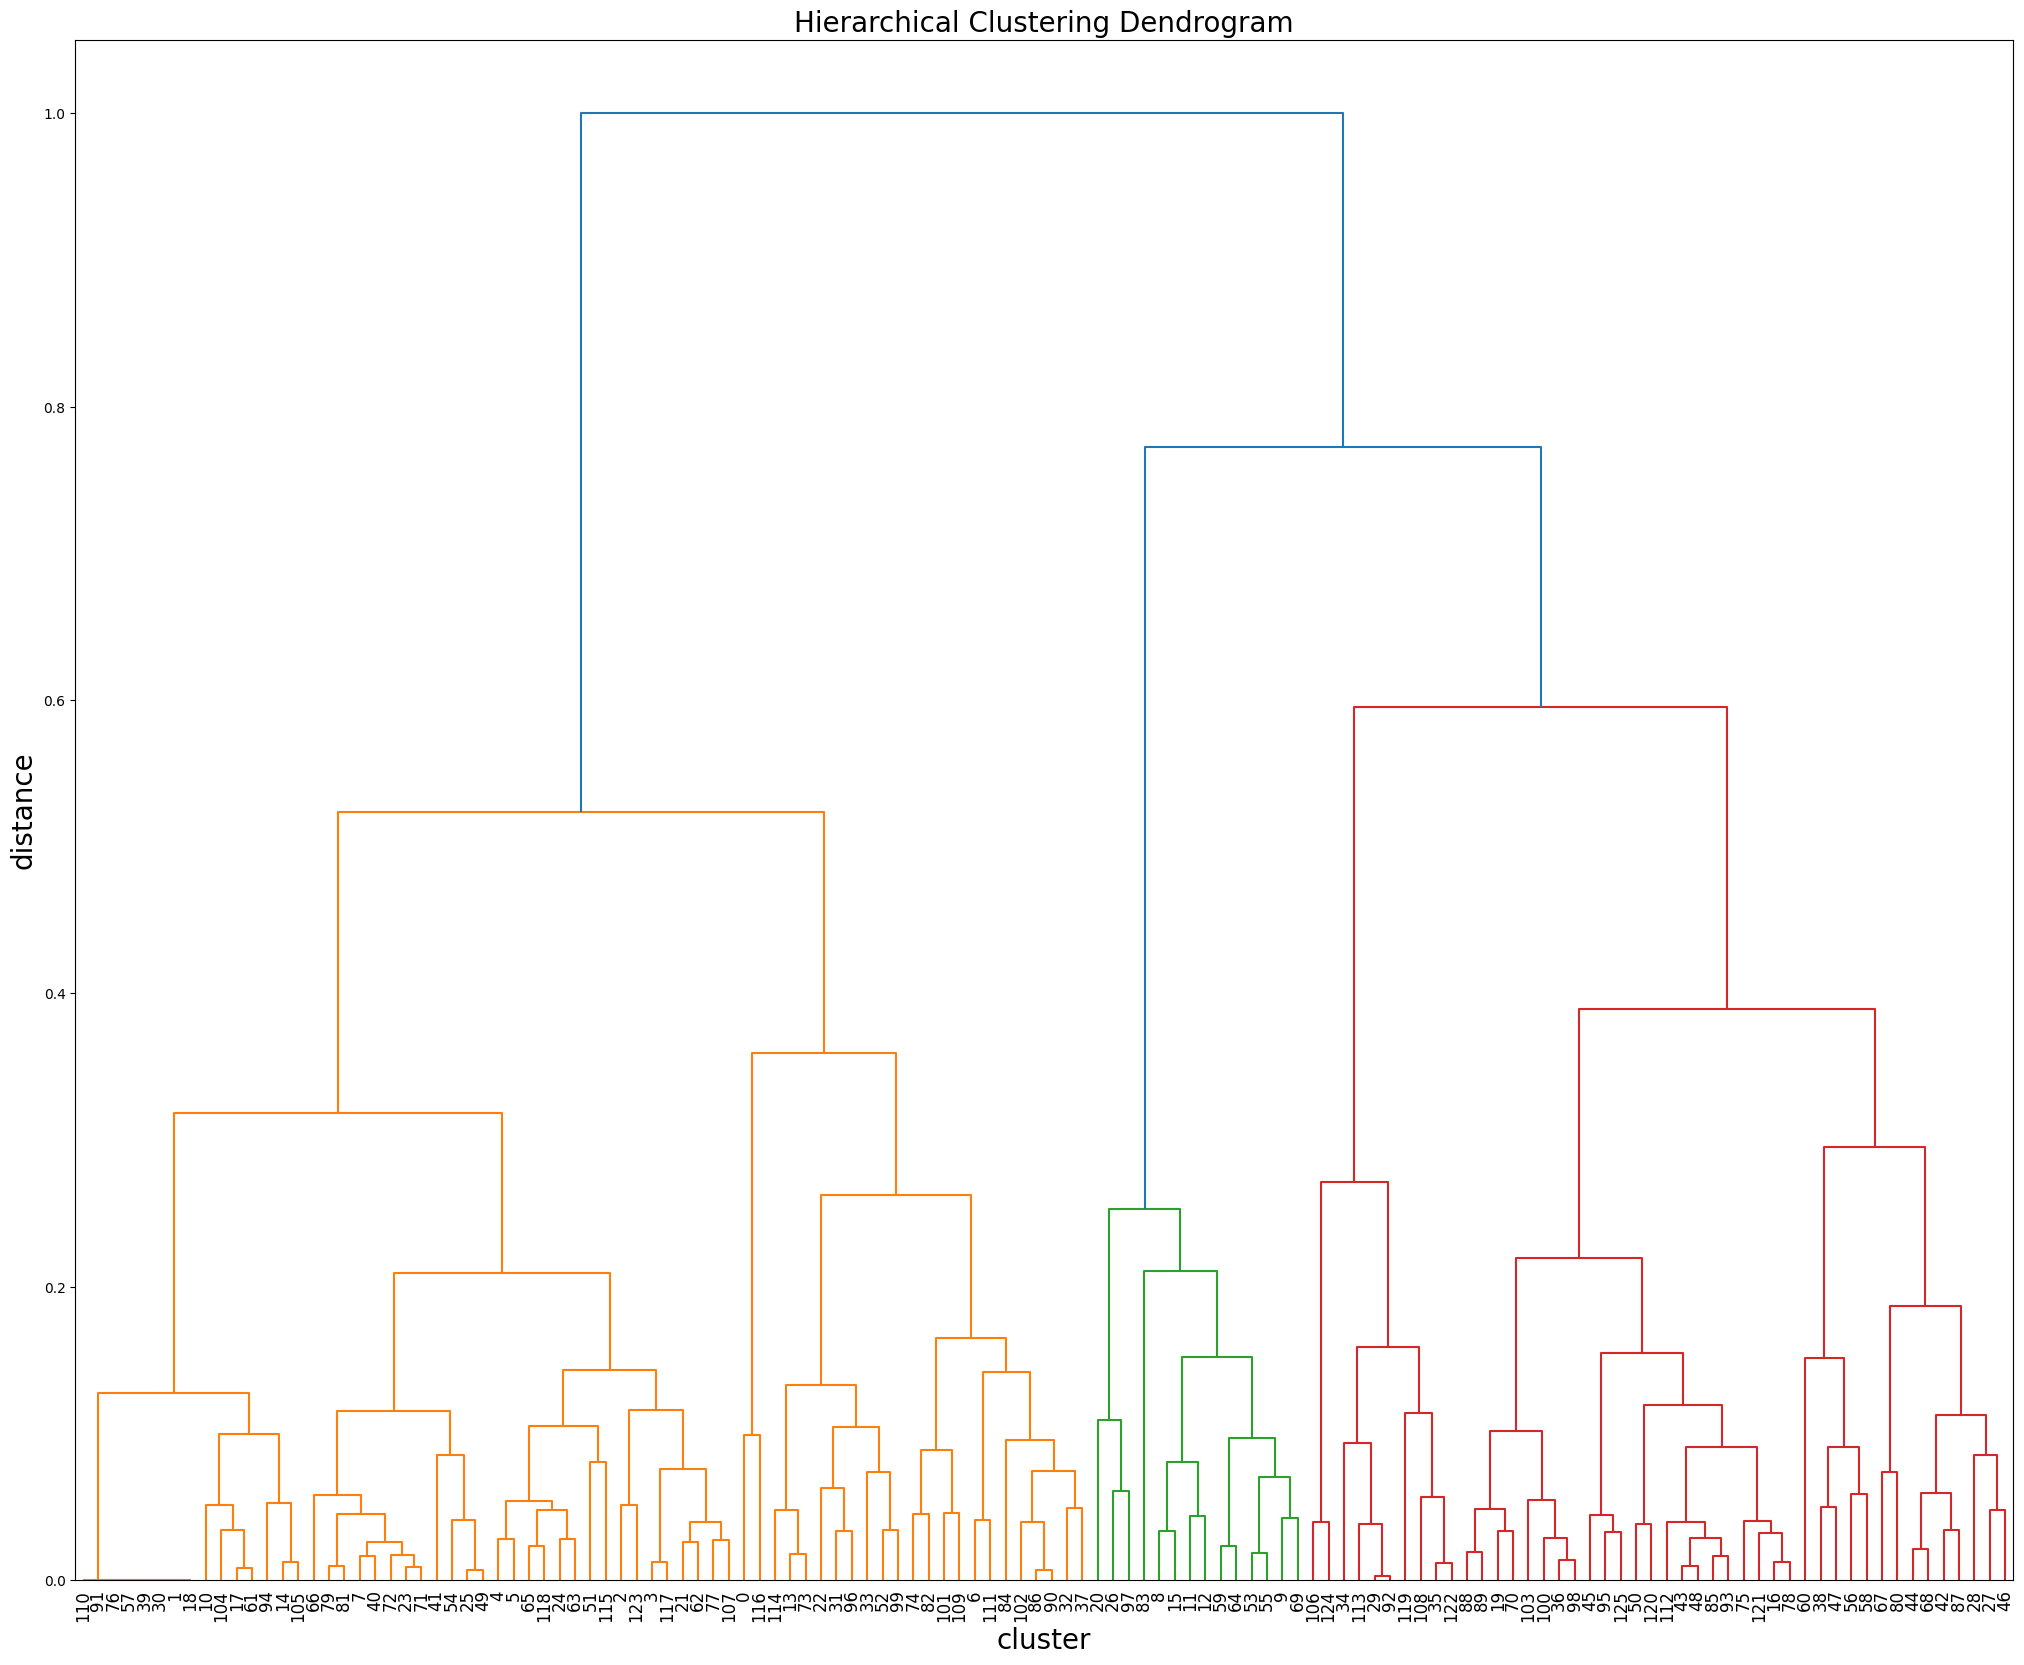

In [26]:
# Custom distance function parameters
coord_weight = 0.4
# coord_weight = 0
similarity_weight = 1-coord_weight
print(f'coord_weight: {coord_weight}, similarity_weight: {similarity_weight}')

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Calculate linkage matrix using custom distance function
# The custom distance function is a weighted average of the haversine distance between coordinates and 
# the similarity between the stop counts
linkage_matrix = linkage(data, method='complete', 
                         metric=lambda x, y: custom_distance(x, y, coord_weight, similarity_weight,min_distance,
                                                             max_distance,min_euclidean_distance,
                                                             max_euclidean_distance))



# calculate full dendrogram
plt.figure(figsize=(25, 20))
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('cluster', fontsize=20)
plt.ylabel('distance', fontsize=20)
# Create a dendrogram for visualization purposes 
dendrogram(linkage_matrix, #truncate_mode='lastp', #p=12, 
           #orientation="right",
           leaf_rotation=90., leaf_font_size=12.)#, show_contracted=True)
plt.show()

In [27]:
#df_stop_count[(df_stop_count['FERMATA']==5103) | (df_stop_count['FERMATA']==-2)]
#stop 1: 5103.0, stop2: -2.0, combined_distance: 36.09851949056943

In [28]:
# 5097 torcello
# 5072 verso chioggia 
# -2 piazzale roma

#dataset_time_slots[dataset_time_slots['FERMATA'] == -5]

### threshold

In [29]:
# Determine clusters based on a desired threshold or number of clusters
threshold = 0.15
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance', depth=2, R=None, monocrit=None)
# print(clusters)

In [30]:
#min_hd = min(haversine_distance_arr)
#max_hd = max(haversine_distance_arr)
#avg_hd = np.average(haversine_distance_arr)

#min_ed = min(eu_similarity_arr)
#max_ed = max(eu_similarity_arr)
#avg_ed = np.average(eu_similarity_arr)

#print(f'min_hd: {min_hd}, max_hd: {max_hd}, avg_hd: {avg_hd}')
#print(f'min_ed: {min_ed}, max_ed: {max_ed}, avg_ed: {avg_ed}')

In [31]:
#print(0.7*0.16)
#print(0.3*0.23)

In [32]:
# Adding cluster labels to the stop count dataframe
df_stop_count['CLUSTER'] = clusters
print(df_stop_count.shape)
df_stop_count.head()

(126, 11)


TICKET_CODE,LATITUDE,LONGITUDE,FERMATA,DESCRIZIONE,7,LOC,RET,STUD,TUR,WKRS,CLUSTER
0,45.223690,12.280678,5072,Chioggia,52.079502,34.986651,1.370513,3.874221,7.683180,0.005933,4
1,45.243614,12.294001,5017,Caroman,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,45.262791,12.299958,5073,Pellestrina,72.559242,20.663507,0.379147,1.516588,4.881517,0.000000,3
3,45.332737,12.316975,5102,S. Maria del,81.355932,9.491525,0.000000,0.338983,8.813559,0.000000,3
4,45.341526,12.308979,5103,Alberoni Far,72.237697,10.399257,0.185701,0.092851,17.084494,0.000000,3


In [33]:
#df_stop_count[df_stop_count['CLUSTER']==3]

In [34]:
cols_cl = ['FERMATA','CLUSTER']
df_cl = df_stop_count.copy()
df_cl = df_cl[cols_cl]

dataset_compl = dataset_compl.merge(df_cl, on=['FERMATA'])

df_sum_validations = dataset_compl.copy()
df_sum_validations = dataset_compl.groupby(['CLUSTER']).size().reset_index()
df_sum_validations.rename(columns={0: 'n_V'},inplace=True)
df_sum_validations.head(3)

,CLUSTER,n_V
0,1,48744
1,2,9277
2,3,1193381


In [35]:
if 'DESCRIZIONE' not in df_stop_count.columns :
    df_stop_count = df_stop_count.merge(fermate, on=['LATITUDE','LONGITUDE','FERMATA'])
#df_stop_count

In [36]:
# get hex codes of tab_20 palette in the format 1:hex_code dict
cluster_colors = dict(zip(range(1,51), sns.color_palette("tab20", 50).as_hex()))
#cluster_colors

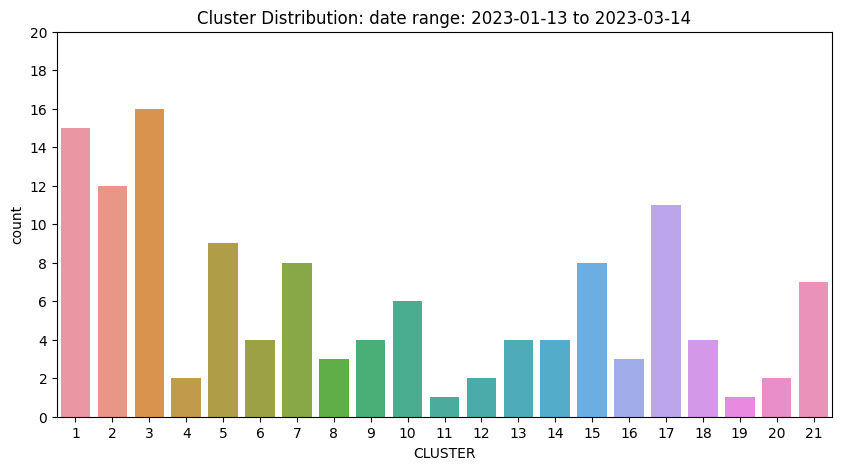

In [37]:
# Countplot of cluster distribution 
fig = plt.figure(figsize=(10, 5))
sns.countplot(x='CLUSTER', data=df_stop_count)#, palette=cluster_colors)
plt.yticks(np.arange(0, max(df_stop_count['CLUSTER'].value_counts()) + 5, 2))
plt.title('Cluster Distribution: ' + 'date range: ' + str(df_stop['DATA'].min().date()) + ' to ' 
          + str(df_stop['DATA'].max().date()))
plt.show()

In [38]:
grouped = df_stop_count.copy()
cols_grouped = ['CLUSTER', 'TUR', '7', 'LOC', 'RET', 'STUD', 'WKRS']
grouped = grouped[cols_grouped]
grouped.reset_index(inplace=True,drop=True)
grouped = grouped.rename_axis(None, axis=1)

In [39]:
grouped_mean = grouped.groupby(['CLUSTER']).mean()
grouped_mean.reset_index(inplace=True)
grouped_mean

,CLUSTER,TUR,7,LOC,RET,STUD,WKRS
0,1,2.120933,95.843840,1.853681,0.020419,0.160850,0.000277
1,2,15.476025,82.201861,1.106793,0.018853,1.196467,0.000000
2,3,11.678756,72.506982,12.506678,0.566114,2.724170,0.017299
3,4,7.174923,57.373084,31.826659,0.685257,2.937111,0.002966
4,5,35.797449,51.983754,8.024313,0.862926,3.331260,0.000297
5,6,23.343698,60.841668,11.809562,1.696430,2.308642,0.000000
6,7,27.070492,69.907889,1.493985,0.048356,1.479278,0.000000
7,8,14.882278,36.069223,37.588341,0.690422,9.169199,1.600538
8,9,13.173747,23.041684,52.782500,1.451464,9.494454,0.056150
9,10,20.737209,24.523512,47.546281,0.590148,6.179761,0.423089


In [40]:
# è la standard deviation: se vuoi la varianza togli sqrt
grouped_var = grouped.groupby(['CLUSTER']).apply(lambda x: np.sqrt(np.var(x)))
grouped_var.drop(columns=['CLUSTER'],inplace = True)
grouped_var.reset_index(inplace=True)

In [41]:
grouped = grouped_mean.merge(grouped_var, on=['CLUSTER'])
grouped = grouped.fillna(0)

In [42]:
grouped = grouped.round(decimals = 3)
grouped

,CLUSTER,TUR_x,7_x,LOC_x,RET_x,STUD_x,WKRS_x,TUR_y,7_y,LOC_y,RET_y,STUD_y,WKRS_y
0,1,2.121,95.844,1.854,0.020,0.161,0.000,3.162,4.709,3.204,0.052,0.354,0.001
1,2,15.476,82.202,1.107,0.019,1.196,0.000,3.170,2.322,1.481,0.045,2.203,0.000
2,3,11.679,72.507,12.507,0.566,2.724,0.017,3.412,4.217,3.202,0.825,2.362,0.057
3,4,7.175,57.373,31.827,0.685,2.937,0.003,0.508,5.294,3.160,0.685,0.937,0.003
4,5,35.797,51.984,8.024,0.863,3.331,0.000,3.913,3.626,3.274,0.794,2.672,0.001
5,6,23.344,60.842,11.810,1.696,2.309,0.000,2.760,2.807,2.520,2.269,1.082,0.000
6,7,27.070,69.908,1.494,0.048,1.479,0.000,4.637,3.359,2.277,0.128,2.941,0.000
7,8,14.882,36.069,37.588,0.690,9.169,1.601,4.728,2.424,0.390,0.411,1.274,2.244
8,9,13.174,23.042,52.782,1.451,9.494,0.056,3.483,2.076,1.414,0.340,2.134,0.025
9,10,20.737,24.524,47.546,0.590,6.180,0.423,3.565,2.878,1.782,0.341,1.292,0.878


In [43]:
# List of ticket codes: 1, 2, 3, 4, 7, LOC, RET, STUD, WKRS
list_tc = ['TUR', '7', 'LOC', 'RET', 'STUD', 'WKRS']
for i in list_tc:
    col_mean = str(i) + '_x'
    col_var = str(i) + '_y'
    col_ts = 'Mean_Var_' + str(i)
    grouped[col_ts] = grouped[col_mean].astype(str) + ' ± ' + grouped[col_var].apply(lambda x: f'{x:.2f}')

In [44]:
# See all columns of the dataframe
pd.set_option('display.max_columns', None)

In [45]:
print(grouped.shape)
grouped.head()

(21, 19)


,CLUSTER,TUR_x,7_x,LOC_x,RET_x,STUD_x,WKRS_x,TUR_y,7_y,LOC_y,RET_y,STUD_y,WKRS_y,Mean_Var_TUR,Mean_Var_7,Mean_Var_LOC,Mean_Var_RET,Mean_Var_STUD,Mean_Var_WKRS
0,1,2.121,95.844,1.854,0.020,0.161,0.000,3.162,4.709,3.204,0.052,0.354,0.001,2.121 ± 3.16,95.844 ± 4.71,1.854 ± 3.20,0.02 ± 0.05,0.161 ± 0.35,0.0 ± 0.00
1,2,15.476,82.202,1.107,0.019,1.196,0.000,3.170,2.322,1.481,0.045,2.203,0.000,15.476 ± 3.17,82.202 ± 2.32,1.107 ± 1.48,0.019 ± 0.04,1.196 ± 2.20,0.0 ± 0.00
2,3,11.679,72.507,12.507,0.566,2.724,0.017,3.412,4.217,3.202,0.825,2.362,0.057,11.679 ± 3.41,72.507 ± 4.22,12.507 ± 3.20,0.566 ± 0.82,2.724 ± 2.36,0.017 ± 0.06
3,4,7.175,57.373,31.827,0.685,2.937,0.003,0.508,5.294,3.160,0.685,0.937,0.003,7.175 ± 0.51,57.373 ± 5.29,31.827 ± 3.16,0.685 ± 0.69,2.937 ± 0.94,0.003 ± 0.00
4,5,35.797,51.984,8.024,0.863,3.331,0.000,3.913,3.626,3.274,0.794,2.672,0.001,35.797 ± 3.91,51.984 ± 3.63,8.024 ± 3.27,0.863 ± 0.79,3.331 ± 2.67,0.0 ± 0.00


In [46]:
cl_final = ['CLUSTER','Mean_Var_TUR','Mean_Var_7','Mean_Var_LOC','Mean_Var_RET','Mean_Var_STUD','Mean_Var_WKRS']
grouped = grouped[cl_final]
grouped = grouped.merge(df_sum_validations, on=['CLUSTER'])

In [47]:
# Group by CLUSTER and aggregate the 'DESCRIZIONE' column into a list
clustered_stops = df_stop_count.groupby('CLUSTER')['DESCRIZIONE'].agg(['count', list]).reset_index()
clustered_stops = clustered_stops.merge(grouped, on = ['CLUSTER'])
#for i in range(6) : 
#    clustered_stops[i] = clustered_stops[i].round(decimals = 3)
#clustered_stops.sort_values(by=[0,1,2,3,4,5])
clustered_stops.rename(columns={'count': 'n_F', 'list': 'STOPS'},inplace=True)
clustered_cols = ['CLUSTER', 'n_F', 'n_V', 'Mean_Var_TUR', 'Mean_Var_7', 'Mean_Var_LOC', 'Mean_Var_RET', 'Mean_Var_STUD', 'Mean_Var_WKRS', 'STOPS']
clustered_stops = clustered_stops[clustered_cols]
clustered_stops

,CLUSTER,n_F,n_V,Mean_Var_TUR,Mean_Var_7,Mean_Var_LOC,Mean_Var_RET,Mean_Var_STUD,Mean_Var_WKRS,STOPS
0,1,15,48744,2.121 ± 3.16,95.844 ± 4.71,1.854 ± 3.20,0.02 ± 0.05,0.161 ± 0.35,0.0 ± 0.00,"[Caroman, Lido S.M.E. , S.Elena-Stad, Lido S. ..."
1,2,12,9277,15.476 ± 3.17,82.202 ± 2.32,1.107 ± 1.48,0.019 ± 0.04,1.196 ± 2.20,0.0 ± 0.00,"[Lido S.M.E. , Giardini Bie, Sacca Fisola, S. ..."
2,3,16,1193381,11.679 ± 3.41,72.507 ± 4.22,12.507 ± 3.20,0.566 ± 0.82,2.724 ± 2.36,0.017 ± 0.06,"[Pellestrina , S. Maria del, Alberoni Far, Lid..."
3,4,2,17155,7.175 ± 0.51,57.373 ± 5.29,31.827 ± 3.16,0.685 ± 0.69,2.937 ± 0.94,0.003 ± 0.00,"[Chioggia, S. Erasmo Pu]"
4,5,9,93847,35.797 ± 3.91,51.984 ± 3.63,8.024 ± 3.27,0.863 ± 0.79,3.331 ± 2.67,0.0 ± 0.00,"[S. Servolo, Spirito Sant, Giardini ""B"", S. Ba..."
5,6,4,63134,23.344 ± 2.76,60.842 ± 2.81,11.81 ± 2.52,1.696 ± 2.27,2.309 ± 1.08,0.0 ± 0.00,"[Tronchetto "", Tronchetto M, S. Alvise, Murano..."
6,7,8,1816,27.07 ± 4.64,69.908 ± 3.36,1.494 ± 2.28,0.048 ± 0.13,1.479 ± 2.94,0.0 ± 0.00,"[S. Lazzaro, Certosa, Accademia ""A, Riva de Bi..."
7,8,3,185740,14.882 ± 4.73,36.069 ± 2.42,37.588 ± 0.39,0.69 ± 0.41,9.169 ± 1.27,1.601 ± 2.24,"[Giudecca Pal, Giardini Bie, Punta Sabbio]"
8,9,4,369148,13.174 ± 3.48,23.042 ± 2.08,52.782 ± 1.41,1.451 ± 0.34,9.494 ± 2.13,0.056 ± 0.03,"[Lido S.M.E. , Lido S.M.E. , Lido S.M.E. , S.E..."
9,10,6,1013783,20.737 ± 3.56,24.524 ± 2.88,47.546 ± 1.78,0.59 ± 0.34,6.18 ± 1.29,0.423 ± 0.88,"[Lido S.M.E. , S. Toma' ""B"", S. Angelo, Rialto..."


In [48]:
# #df_stop_count[df_stop_count['CLUSTER']==21]
# grouped = df_stop_count.copy()
# cols_grouped = ['CLUSTER', '1', '2', '3', '4', '7', 'LOC', 'RET', 'STUD', 'WKRS']
# grouped = grouped[cols_grouped]
# grouped.reset_index(inplace=True,drop=True)
# grouped = grouped.rename_axis(None, axis=1)
# #grouped

# grouped_mean = grouped.groupby(['CLUSTER']).mean()
# grouped_mean.reset_index(inplace=True)
# grouped_mean

# # è la standard deviation: se vuoi la varianza togli sqrt
# grouped_var = grouped.groupby(['CLUSTER']).apply(lambda x: np.sqrt(np.var(x)))
# grouped_var.drop(columns=['CLUSTER'],inplace = True)
# grouped_var.reset_index(inplace=True)

# grouped = grouped_mean.merge(grouped_var, on=['CLUSTER'])
# grouped = grouped.fillna(0)
# #grouped

# grouped = grouped.round(decimals = 3)
# grouped
# grouped

# for i in range(6) :  
#     col_mean = str(i) + '_x'
#     col_var = str(i) + '_y'
#     col_ts = 'Mean_Var_' + str(i)
#     grouped[col_ts] = grouped[col_mean].astype(str) + ' ± ' + grouped[col_var].apply(lambda x: f'{x:.2f}')

# cl_final = ['CLUSTER','Mean_Var_0','Mean_Var_1','Mean_Var_2','Mean_Var_3','Mean_Var_4','Mean_Var_5']
# grouped = grouped[cl_final]

# #grouped

# # Group by CLUSTER and aggregate the 'DESCRIZIONE' column into a list
# clustered_stops = df_stop_count.groupby('CLUSTER')['DESCRIZIONE'].agg(['count', list]).reset_index()
# clustered_stops = clustered_stops.merge(grouped, on = ['CLUSTER'])
# #for i in range(6) : 
# #    clustered_stops[i] = clustered_stops[i].round(decimals = 3)
# #clustered_stops.sort_values(by=[0,1,2,3,4,5])
# clustered_stops.rename(columns={'count': 'NUM', 'list': 'STOPS'},inplace=True)
# clustered_cols = ['CLUSTER', 'NUM', 'Mean_Var_0', 'Mean_Var_1', 'Mean_Var_2','Mean_Var_3', 'Mean_Var_4',
#                   'Mean_Var_5','STOPS']
# clustered_stops = clustered_stops[clustered_cols]
# clustered_stops

In [49]:
# Create a folium map centered around the mean latitude and longitude
center_lat = np.mean(df_stop_count['LATITUDE'])
center_lon = np.mean(df_stop_count['LONGITUDE'])
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Create markers for each stop and color them based on clusters
for idx, row in df_stop_count.iterrows():
    # Retrieve Cluster id and set it as a integer
    cluster = int(row['CLUSTER'])

    cluster_color = cluster_colors.get(cluster, 'gray')  # Default to gray if cluster color is not defined
    #print(cluster_color)

    # cluster_color = cluster_
    # colors.get(cluster, 'gray')  # Default to gray if cluster color is not defined
    # Add a label to the marker with the name of the stop contained in the column 'DESCRIZIONE'
    # Retrieve the name of the stop from the column 'DESCRIZIONE' of the dataframe df matching the FERMATA
    location = df_stop_count[df_stop_count['FERMATA'] == row['FERMATA']]['DESCRIZIONE'].values[0]
    # Retrieve FERMATA id and set it as a integer
    fermata = int(row['FERMATA'])
    # Retrieve the total number of validations for the stop
    tot_validations = clustered_stops.loc[clustered_stops['CLUSTER'] == cluster, 'n_V'].iloc[0]
    # Retrieve the total number of stops for the stop
    tot_stops = clustered_stops.loc[clustered_stops['CLUSTER'] == cluster, 'n_F'].iloc[0]
    # Retrieve Cluster id and set it as a integer
    cluster = int(row['CLUSTER'])
    mean_tur = clustered_stops.loc[clustered_stops['CLUSTER'] == cluster, 'Mean_Var_TUR'].iloc[0]
    mean_7 = clustered_stops.loc[clustered_stops['CLUSTER'] == cluster, 'Mean_Var_7'].iloc[0]
    mean_loc = clustered_stops.loc[clustered_stops['CLUSTER'] == cluster, 'Mean_Var_LOC'].iloc[0]
    mean_ret = clustered_stops.loc[clustered_stops['CLUSTER'] == cluster, 'Mean_Var_RET'].iloc[0]
    mean_stud = clustered_stops.loc[clustered_stops['CLUSTER'] == cluster, 'Mean_Var_STUD'].iloc[0]
    mean_wkrs = clustered_stops.loc[clustered_stops['CLUSTER'] == cluster, 'Mean_Var_WKRS'].iloc[0]
    # Create a string for popup message containing the name of the stop, FERMATA and the cluster in BOLD
    #popup_message = f"<b><i>{location}</i></b><br><br><u>Fermata:</u> {fermata}<br><u>Cluster:</u> {cluster}<br><u>Mean and sd:</u> {mean_0}<br>"
    popup=folium.Popup(f"<b><i>{location}</i></b><br><br><u>Fermata:</u> {fermata}<br><u>Cluster:</u> {cluster}<br><u>Tot stops:</u> {tot_stops}<br><u>Tot validations:</u> {tot_validations}<br><u>Mean and sd:</u> <i>Mean Tourists:</i>{mean_tur},<i>Mean 75 minutes:</i> {mean_7}, <i>Mean Locals:</i> {mean_loc}, <i>Mean Retired:</i> {mean_ret}, <i>Mean Students:</i> {mean_stud}, <i>Mean Workers:</i> {mean_wkrs}<br>", max_width=300, min_width=300)


    # Add a marker to the map with the popup message and the color of the cluster
    # folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']], popup=popup_message, icon=folium.Icon(color=cluster_color)).add_to(m)
    # Add a marker to the map with the popup message and the color of the cluster
    # folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']], popup=popup_message, icon=folium.Icon(color=cluster_color)).add_to(m)
    if fermata < 0:
        folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']], popup=popup, 
                      icon=folium.Icon(color='white', icon_color=cluster_color, icon='bus', prefix='fa')).add_to(m)
    else:
        folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']], popup=popup, 
                      icon=folium.Icon(color='white', icon_color=cluster_color, icon='ship', prefix='fa')).add_to(m)

# Add layer control and show map
#m.add_child(folium.LayerControl(collapsed=False))
m

In [50]:
# print the number of unique values of the column 'FERMATA'
print('Number of unique values of the column FERMATA: {}'.format(df_stop_count['FERMATA'].nunique()))
# print the numer of clusters
print('Number of clusters: {}'.format(df_stop_count['CLUSTER'].nunique()))
# Print the average number of stops per cluster
print('Average number of stops per cluster: {}'.format(df_stop_count['CLUSTER'].value_counts().mean()))

Number of unique values of the column FERMATA: 126
Number of clusters: 21
Average number of stops per cluster: 6.0


In [51]:
# Export the map to an HTML file

th = str(threshold)
th = th.replace('.', '')
print(f'threshold: {th}')
num_cl = str(df_stop_count.CLUSTER.max())
print(f'number of clusters: {num_cl}')

file_name = 'carnevale_entire_coord0'
dr_map = 'Documenti/risultati clustering/nuovo_13Sett_TURISTI_UNITI/' + file_name + '/'
#time = datetime.now().strftime("%Y%m%d-%H%M%S")
try:
    m.save(dr+dr_map + file_name + '_threshold_' + th + '_' + num_cl + 'cluster' +'.html')
except:
    # Create a new folder in map folder
    os.mkdir(dr+dr_map + file_name)
    m.save(dr+dr_map + file_name + '_threshold_' + th + '_' + num_cl + 'cluster' +'.html')

threshold: 015
number of clusters: 21


In [52]:
# For each Cluster id, print the number of stops in that cluster, the FERMATA id and the name of the stop
df_stop_count_copy = df_stop_count.copy()
# To df_stop_count add a column with the name of the stop matching the FERMATA
#df_stop_count_copy['DESCRIZIONE'] = df_stop_count_copy['FERMATA'].
#apply(lambda x: df[df['FERMATA'] == x]['DESCRIZIONE'].values[0])

# Consider only the columns ['Cluster', 'FERMATA', 'DESCRIZIONE']
df_stop_count_copy = df_stop_count_copy[['CLUSTER', 'FERMATA', 'DESCRIZIONE']]
df_stop_count_copy.columns.name = None

#df_stop_count_copy.groupby(['CLUSTER'])
#df_stop_count_copy = df_stop_count_copy.set_index(['CLUSTER','FERMATA'])
df_stop_count_copy


print('Number of clusters: ', max(df_stop_count_copy['CLUSTER']))
print('\n')
for cluster in range(1, max(df_stop_count_copy['CLUSTER']) + 1):
    print(f"CLUSTER {cluster} contains {len(df_stop_count_copy[df_stop_count_copy['CLUSTER'] == cluster])} stops.")
    print(df_stop_count_copy[df_stop_count_copy['CLUSTER'] == cluster][['FERMATA', 'DESCRIZIONE']])
    print('\n')

Number of clusters:  21


CLUSTER 1 contains 15 stops.
     FERMATA   DESCRIZIONE
1       5017       Caroman
10      5158  Lido S.M.E. 
14      5004  S.Elena-Stad
17      5099  Lido S. Nico
18      5118   Zitelle "A"
30      5124  Giardini "A"
39      5054  S. Marco Val
57      5166    Rialto "A"
61      5026  Tronchetto F
76      5025  Tronchetto "
91      5090       Vignole
94      5189    Guglie "B"
104     5120  Murano Colon
105     5095  Murano Faro 
110     5610  Lazzaretto N


CLUSTER 2 contains 12 stops.
    FERMATA   DESCRIZIONE
7      5152  Lido S.M.E. 
23     5128  Giardini Bie
25     5023  Sacca Fisola
40     5056  S. Marco Gia
41     5008  Arsenale "A"
49     5012  San Marco-Sa
54     5044  S. Toma' "A"
66     5030  P.le Roma "F
71     5029  P.le Roma "D
72     5027  P.le Roma "C
79     5020      Ospedale
81     5033  Ferrovia "A"


CLUSTER 3 contains 16 stops.
     FERMATA      DESCRIZIONE
2       5073     Pellestrina 
3       5102     S. Maria del
4       5103     Albero

In [53]:
#controlliamo un cluster 
df_stop_count[df_stop_count['CLUSTER']==6]

TICKET_CODE,LATITUDE,LONGITUDE,FERMATA,DESCRIZIONE,7,LOC,RET,STUD,TUR,WKRS,CLUSTER
74,45.440094,12.306348,5024,"Tronchetto """,65.458683,13.592814,0.328144,1.085030,19.535329,0.0,6
82,45.441383,12.309408,5075,Tronchetto M,60.721382,14.970197,0.091701,1.895155,22.321565,0.0,6
101,45.448704,12.329509,5059,S. Alvise,58.779528,9.383202,0.761155,4.041995,27.034121,0.0,6
109,45.454853,12.347479,5067,Murano Seren,58.407080,9.292035,5.604720,2.212389,24.483776,0.0,6


In [54]:
#dataset_compl[dataset_compl['FERMATA']==5090]